In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cancer_patient.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
df.nunique()

index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [5]:
df.drop(columns=["index", "Patient Id"],inplace=True)

In [6]:
df1 = df.copy()
df1['Level'] = df1['Level'].map(
    {
        "High" : 2,
        "Medium" : 1,
        "Low" : 0
    }
)

In [7]:
df1.corr()['Level'][:-1]

Age                         0.060048
Gender                     -0.164985
Air Pollution               0.636038
Alcohol use                 0.718710
Dust Allergy                0.713839
OccuPational Hazards        0.673255
Genetic Risk                0.701303
chronic Lung Disease        0.609971
Balanced Diet               0.706273
Obesity                     0.827435
Smoking                     0.519530
Passive Smoker              0.703594
Chest Pain                  0.645461
Coughing of Blood           0.782092
Fatigue                     0.625114
Weight Loss                 0.352738
Shortness of Breath         0.497024
Wheezing                    0.242794
Swallowing Difficulty       0.249142
Clubbing of Finger Nails    0.280063
Frequent Cold               0.444017
Dry Cough                   0.373968
Snoring                     0.289366
Name: Level, dtype: float64

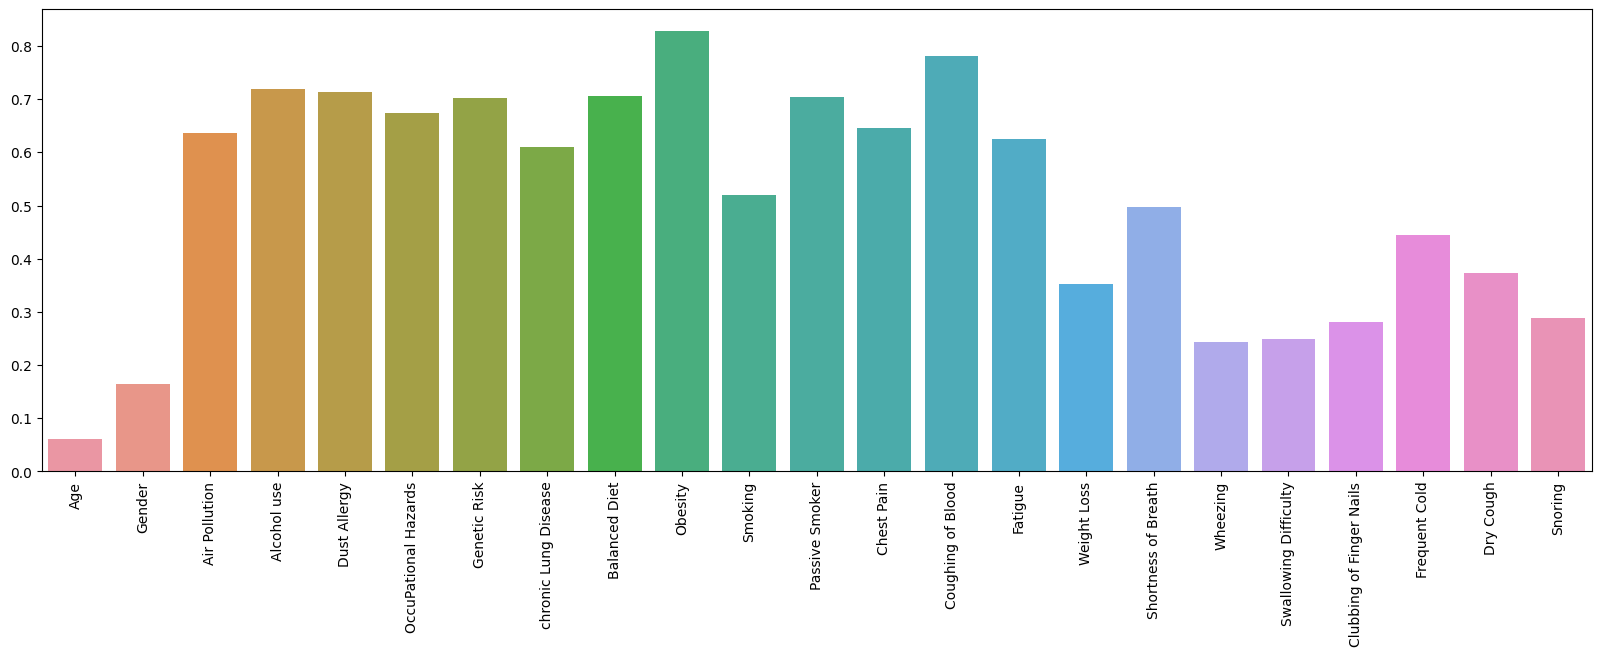

In [8]:
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(
    x=df1.corr()['Level'][:-1].index,
    y=abs(df1.corr()['Level'][:-1].values),
)
plt.xticks(rotation=90);

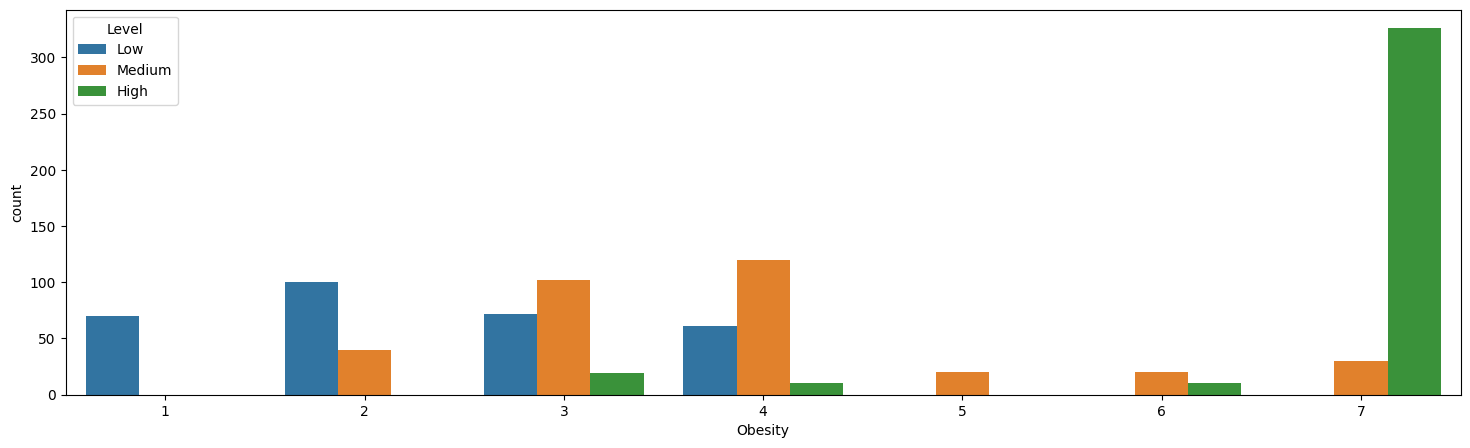

In [9]:
fig,ax = plt.subplots(figsize=(18,5))
sns.countplot(
    data=df,
    x="Obesity",
    hue="Level"
);

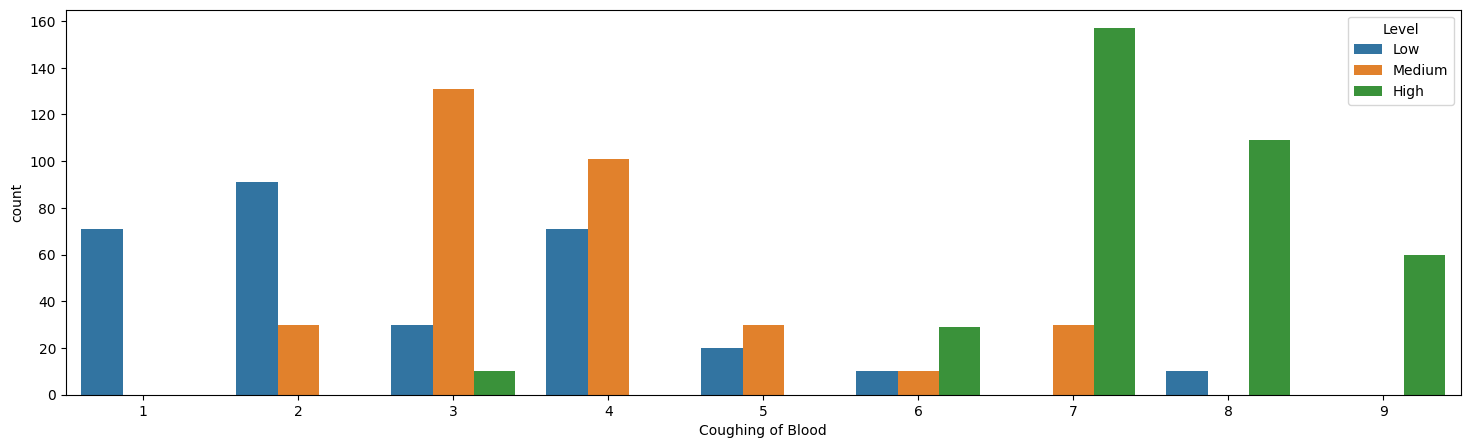

In [10]:
fig,ax = plt.subplots(figsize=(18,5))
sns.countplot(
    data=df,
    x="Coughing of Blood",
    hue="Level"
);

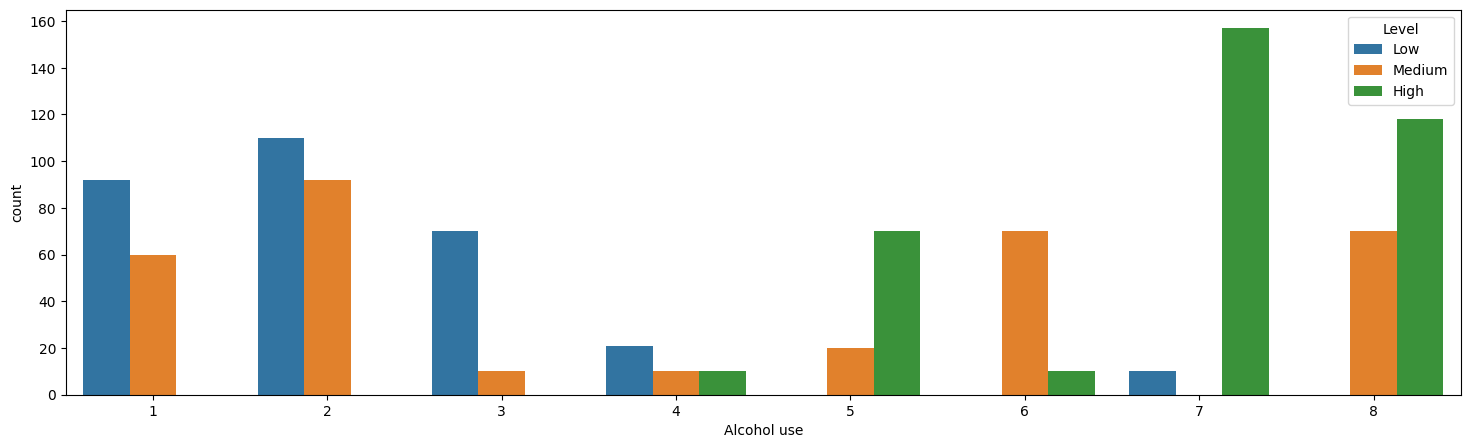

In [11]:
fig,ax = plt.subplots(figsize=(18,5))
sns.countplot(
    data=df,
    x="Alcohol use",
    hue="Level"
);

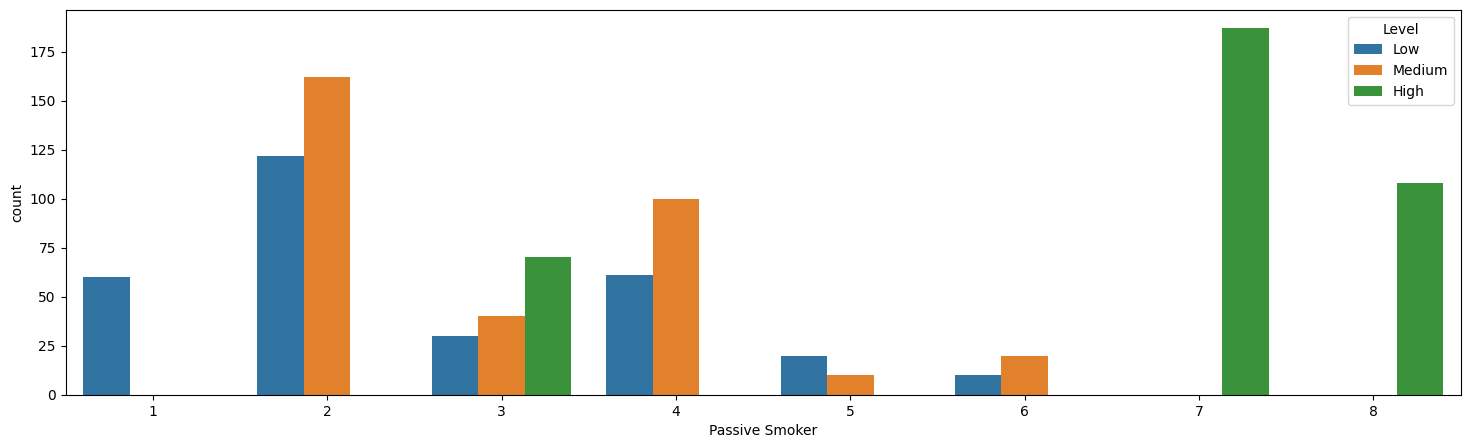

In [12]:
fig,ax = plt.subplots(figsize=(18,5))
sns.countplot(
    data=df,
    x="Passive Smoker",
    hue="Level"
);

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# X_train["Cancer"] = y_train
# X_test["Cancer"] = y_test
# with pd.ExcelWriter('lung_cancer_dataset.xlsx') as writer:  
#     X_train.to_excel(writer, sheet_name='Train')
#     X_test.to_excel(writer, sheet_name='Test')

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[119   0   0]
 [  0  84   0]
 [  0   0  97]]


1.0

In [16]:
classifier.get_depth()

4

In [17]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_11 <= 6.50
|   |--- feature_17 <= 4.50
|   |   |--- feature_9 <= 4.50
|   |   |   |--- feature_22 <= 4.50
|   |   |   |   |--- class: Low
|   |   |   |--- feature_22 >  4.50
|   |   |   |   |--- class: Medium
|   |   |--- feature_9 >  4.50
|   |   |   |--- feature_13 <= 7.50
|   |   |   |   |--- class: Medium
|   |   |   |--- feature_13 >  7.50
|   |   |   |   |--- class: High
|   |--- feature_17 >  4.50
|   |   |--- class: Medium
|--- feature_11 >  6.50
|   |--- class: High



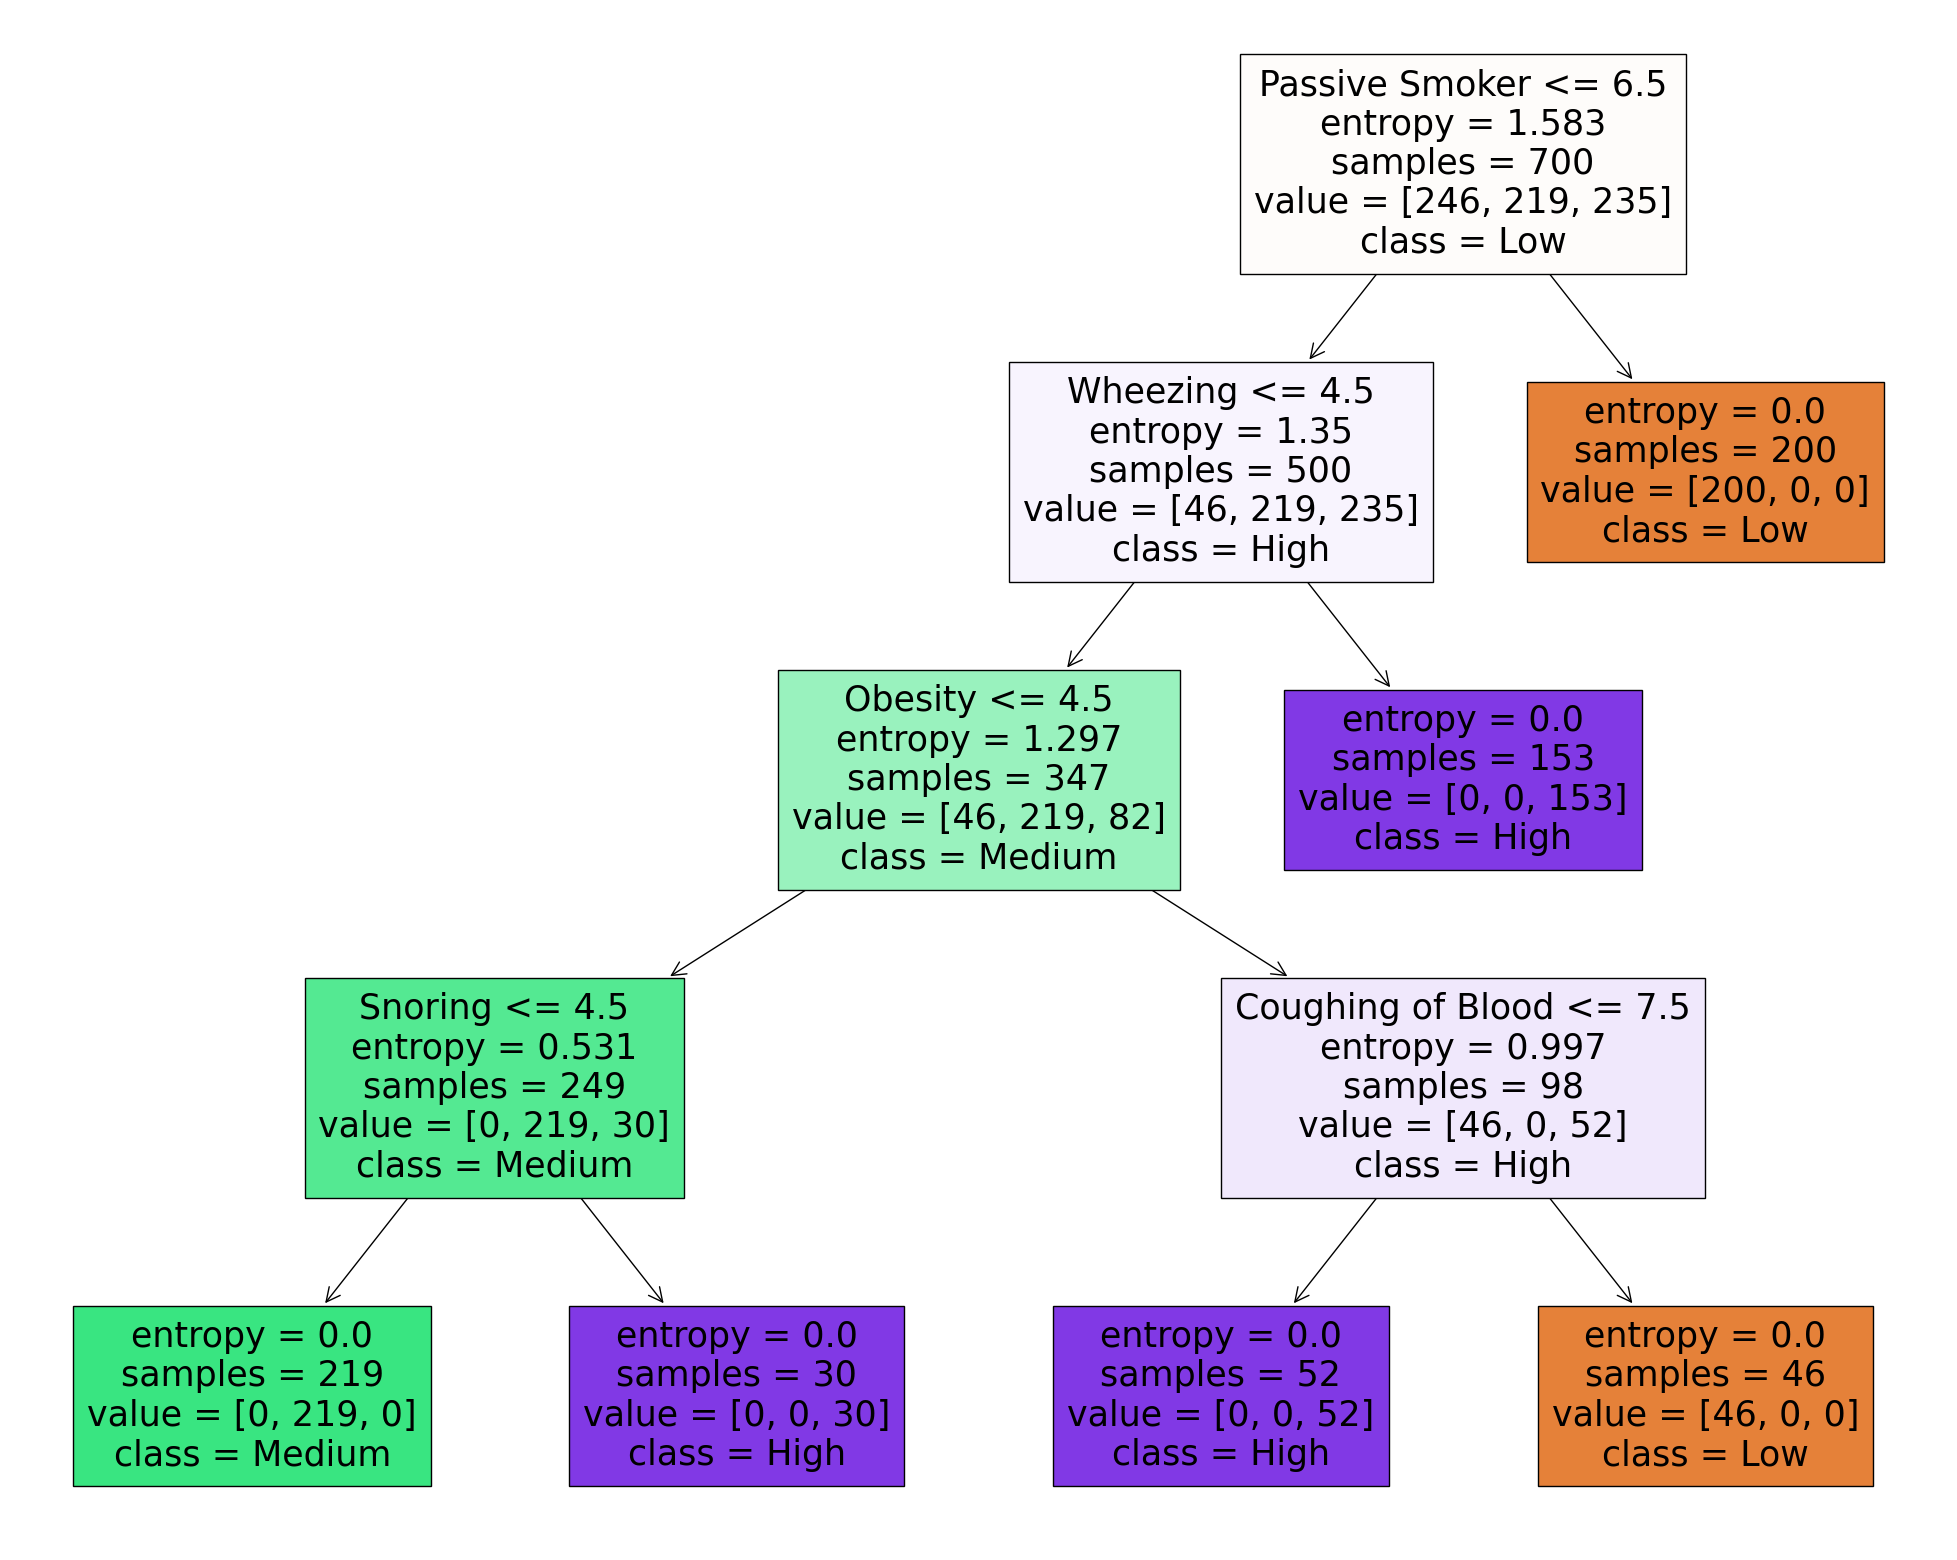

In [18]:
fig = plt.figure(figsize=(25,20))
dec_tree = tree.plot_tree(classifier, 
                   feature_names=X.columns,  
                   class_names=y,
                   filled=True)

In [19]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [20]:
mapping = {
        1 : 1,
        2 : 1,
        3 : 1,
        4 : 2,
        5 : 2,
        6 : 2,
        7 : 3,
        8 : 3,
        9 : 3
    } 

for column in df1.columns[2:-1]:
    df1[column] = df1[column].map(mapping)

df1.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,1,2,2,2,1,1,1,2,...,1,2,1,1,1,1,1,1,2,0
1,17,1,1,1,2,1,2,1,1,1,...,1,1,3,3,2,1,1,3,1,1
2,35,1,2,2,2,2,2,2,2,3,...,3,3,3,1,1,2,2,3,1,2
3,37,1,3,3,3,3,2,3,3,3,...,2,1,1,1,2,2,2,3,2,2
4,46,1,2,3,3,3,3,2,3,3,...,1,1,2,1,2,1,2,1,1,2


In [21]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 83   1   0]
 [  0  97   0]
 [  0   0 119]]


0.9966666666666667

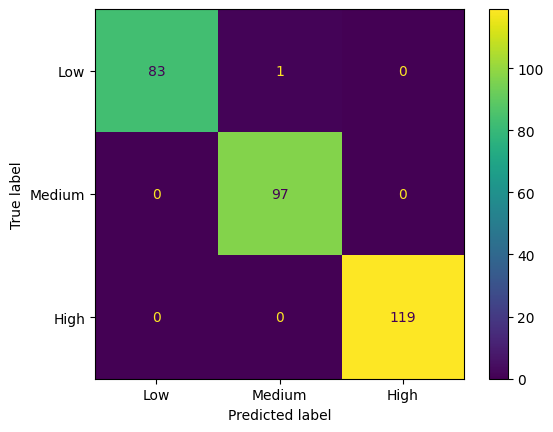

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm,display_labels=["Low","Medium","High"]).plot();